This post addresses exercise 3 of chapter 1 from the book The Essence of Neural Networks. For the given data points, i.e., $(x, target)$ and given the start weights $$output = 0.5 \times x + 0.5$$ calculate the new line after one pass through the data using the Widrow-Hoff (delta) learning rule with a learning rate of 0.3.

MSE with initial weights: 0.78609375
MSE after weight update 1: 0.5599819729687499
MSE after weight update 2: 0.4167126762018515
MSE after weight update 3: 0.30456851344379055
MSE after weight update 4: 0.18159159938773783
MSE after weight update 5: 0.09553683273341007
MSE after weight update 6: 0.0332085570923777
MSE after weight update 7: 0.05905046420837661
MSE after weight update 8: 0.032742793242636695


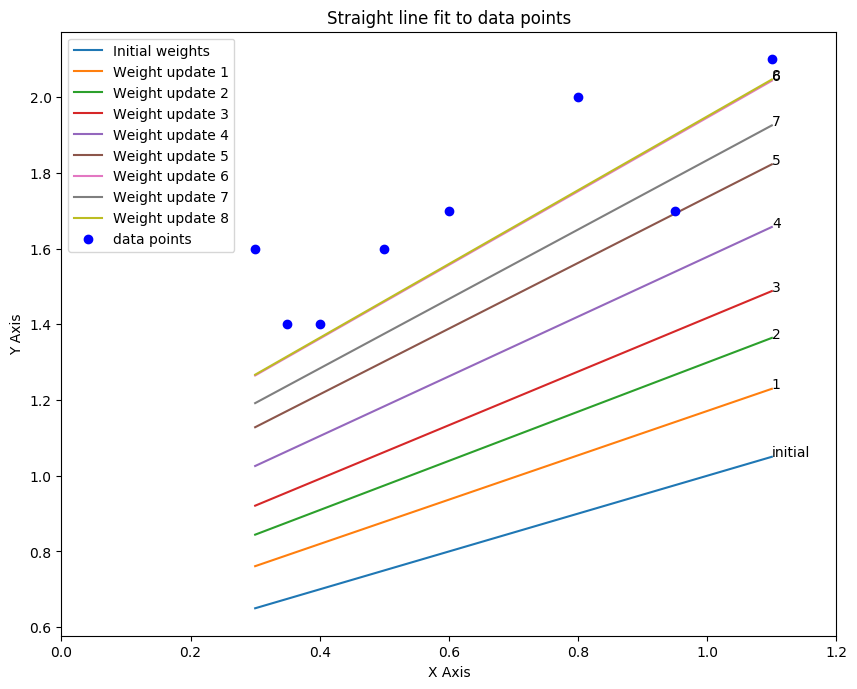

In [2]:
"""
For the given data points (i.e, (x, target)), and given the start weights

output = 0.5x + 0.5, 

calculate the new line after one pass through the data using the Widrow-Hoff
(delta) learning rule with a learning rate of 0.3 (Note: there will be a
new line after each pattern has been presented.) 
"""


import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error

# input data points, x-coordinates
x = np.array([0.30, 0.35, 0.40, 0.50, 0.60, 0.80, 0.95, 1.10])
# target output or true output, i.e., true y-coordinates
target = np.array([1.60, 1.40, 1.40, 1.60, 1.70, 2.00, 1.70, 2.10])

# number of data points
n = len(x)

# learning rate eta
eta = 0.3

fig = plt.figure(dpi=100, figsize=(10, 8))
p1 = fig.add_subplot(111)

# For fitting a line to data points, we have slop m and intercept c as 
# parameters. In case of neural network, they are network parameters. 
# We can consider them as weights of this single neuron neural network.
# After passing the each input pattern x_i (where i goes from 0 to n)
# we get a value of output y_i and then we measure the error with
# respect to corresponding target value. That difference in target and
# output y_i gives error, delta. This delta we use for weights update and 
# then pass another input pattern x_i.

# Network:
#        c = w1   ___
#  1 ------------|   |
#        m = w2  |   |----
#  x ------------|___|
#
# weights, w1 is the intercept c and weight w2 is the slop m
# Start weights are 0.5 and 0.5 
w1 = 0.5
w2 = 0.5
y_initial = w2*x + w1

p1.plot(x, y_initial, label='Initial weights')
plt.text(x[-1], y_initial[-1], '{}'.format('initial'))
print('MSE with initial weights:', np.mean((target - y_initial)**2))

# one pass through the data
for i in range(n):
    y_i = w2*x[i] + w1
    delta = target[i] - y_i
    delta_w = eta*delta*x[i]
    w1 = w1 + delta_w
    w2 = w2 + delta_w

    # equation of line after first update of weights
    y = w2*x + w1
    p1.plot(x, y, label='Weight update {}'.format(i+1))
    plt.text(x[-1], y[-1], '{}'.format(i+1))
    print('MSE after weight update {}: {}'.format(i+1, np.mean((target - y)**2)))

p1.plot(x, target, 'bo', label='data points')
p1.set_title("Straight line fit to data points")
p1.set_xlabel("X Axis")
p1.set_ylabel("Y Axis")
p1.set_xlim(0.0, 1.2)
p1.legend()
plt.show()
#fig.savefig('Ex3.png', dpi=300)